In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
pat_data=pd.read_csv("patients.csv")
pat_data.head()

,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76


In [12]:
df=pat_data.head()
df

,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76


In [20]:
# feature selection

x1 = df[["age", "satisfaction"]]


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1_scaled = scaler.fit_transform(x1)

In [25]:
# wcss = with in clusters sum of distance
from sklearn.cluster import KMeans
wcss = []
k_range = range(1,6)

for k in k_range:
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(x1_scaled)
  wcss.append(kmeans.inertia_)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

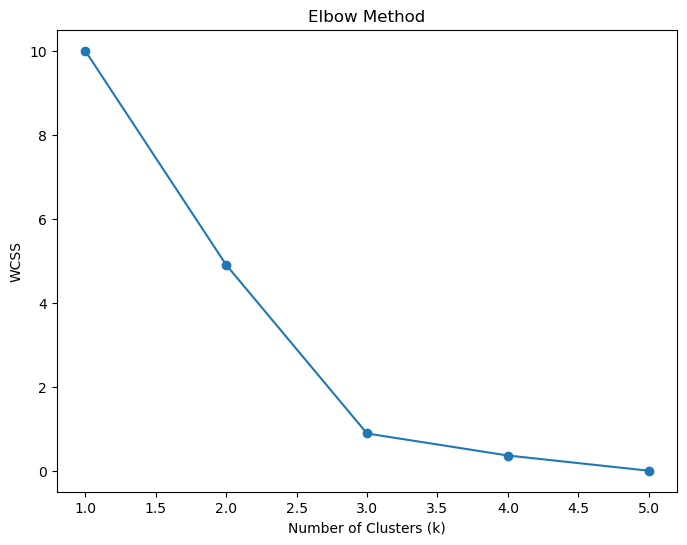

In [26]:
plt.figure(figsize=(8,6))
plt.plot(k_range,wcss , marker = "o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [30]:
from sklearn.metrics import silhouette_score

sil_score = []
# The range should start from 2 because silhouette score requires at least 2 clusters
k_range = range(2,len(x1_scaled))

for k in k_range:
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(x1_scaled)
  y_pred = kmeans.predict(x1_scaled)
  sil_score.append(silhouette_score(x1_scaled,y_pred))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


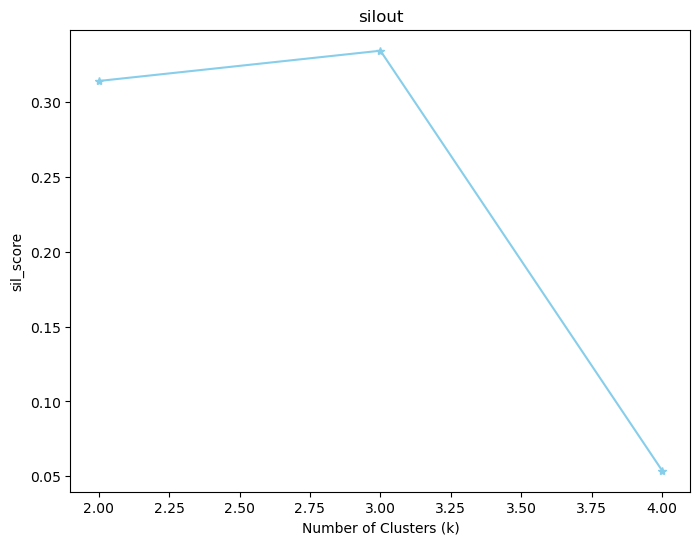

In [31]:
plt.figure(figsize=(8,6))
plt.plot(k_range,sil_score , marker = "*",color="skyblue")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("sil_score")
plt.title("silout")
plt.show()

In [32]:
k_best = k_range[np.argmax(sil_score)] #k_range[5]
k_best

3

In [33]:
k_means = KMeans(n_clusters=k_best,random_state=42)
k_means.fit(x1_scaled)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [34]:
labels = k_means.predict(x1_scaled)
df["cluster_kmean"] = labels
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17216\3908029831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster_kmean"] = labels


,patient_id,name,age,arrival_date,departure_date,service,satisfaction,cluster_kmean
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61,2
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83,0
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83,1
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81,1
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76,1


In [35]:
df.columns

Index(['patient_id', 'name', 'age', 'arrival_date', 'departure_date',
       'service', 'satisfaction', 'cluster_kmean'],
      dtype='object')

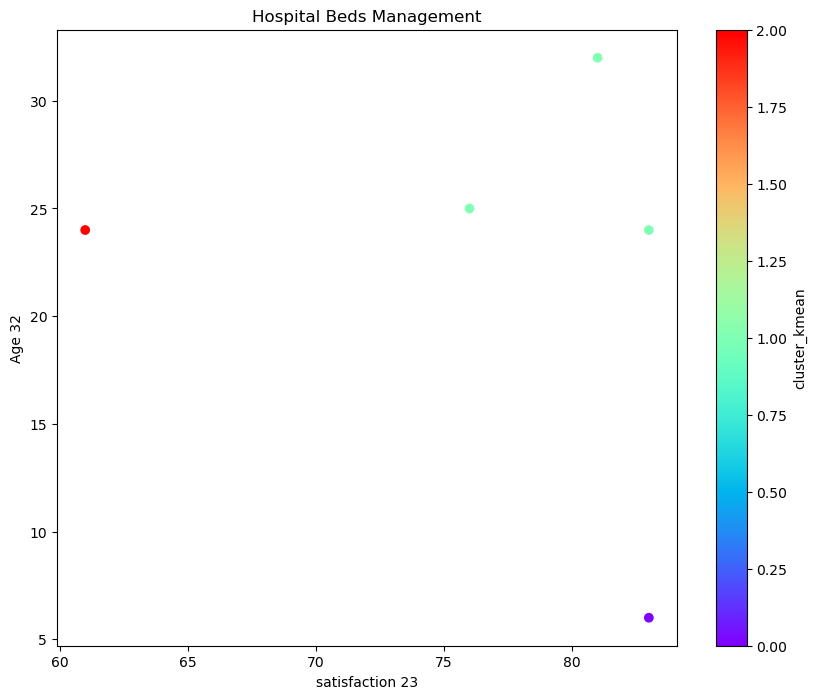

In [37]:
plt.figure(figsize=(10,8))
plt.scatter(df["satisfaction"],df["age"],c=df["cluster_kmean"],cmap="rainbow")
plt.xlabel("satisfaction 23")
plt.ylabel("Age 32")
plt.title("Hospital Beds Management")
plt.colorbar(label="cluster_kmean")
plt.show()

In [39]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2,min_samples=5)
dbscan.fit(x1_scaled)

DBSCAN(eps=2)

In [41]:
dbscan.fit(x1)     
df["db_clusters"] = dbscan.labels_  
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17216\1716688787.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["db_clusters"] = dbscan.labels_


,patient_id,name,age,arrival_date,departure_date,service,satisfaction,cluster_kmean,db_clusters
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61,2,-1
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83,0,-1
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83,1,-1
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81,1,-1
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76,1,-1


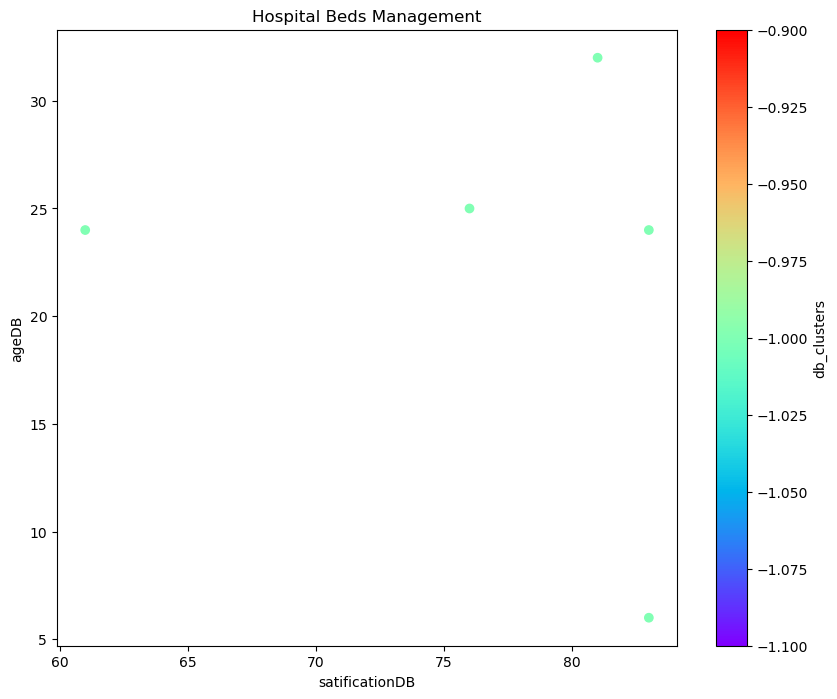

In [42]:
plt.figure(figsize=(10,8))
plt.scatter(df["satisfaction"],df["age"],c=df["db_clusters"],cmap="rainbow")
plt.xlabel("satificationDB")
plt.ylabel("ageDB")
plt.title("Hospital Beds Management")
plt.colorbar(label="db_clusters")
plt.show()